In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

(array([  5.,  26.,  80., 166., 247., 247., 147.,  63.,  16.,   3.]),
 array([-3.18085479, -2.53175897, -1.88266315, -1.23356734, -0.58447152,
         0.0646243 ,  0.71372012,  1.36281594,  2.01191176,  2.66100758,
         3.3101034 ]),
 <a list of 10 Patch objects>)

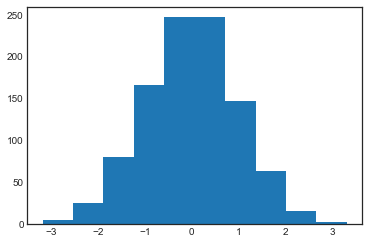

In [2]:
data = np.random.randn(1000)
plt.hist(data)

### More Customized Histogram

(array([0.00462181, 0.        , 0.01848726, 0.02310907, 0.02773088,
        0.06932721, 0.06932721, 0.12941079, 0.17100711, 0.26344339,
        0.23109069, 0.27268701, 0.31890515, 0.38361054, 0.43907231,
        0.41596324, 0.38823236, 0.33739241, 0.29579608, 0.1663853 ,
        0.21722525, 0.11554534, 0.1016799 , 0.07394902, 0.0323527 ,
        0.03697451, 0.00462181, 0.00462181, 0.00462181, 0.00462181]),
 array([-3.18085479, -2.96448952, -2.74812425, -2.53175897, -2.3153937 ,
        -2.09902843, -1.88266315, -1.66629788, -1.44993261, -1.23356734,
        -1.01720206, -0.80083679, -0.58447152, -0.36810624, -0.15174097,
         0.0646243 ,  0.28098958,  0.49735485,  0.71372012,  0.93008539,
         1.14645067,  1.36281594,  1.57918121,  1.79554649,  2.01191176,
         2.22827703,  2.4446423 ,  2.66100758,  2.87737285,  3.09373812,
         3.3101034 ]),
 <a list of 1 Patch objects>)

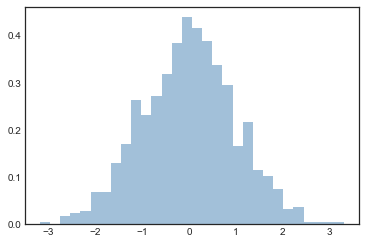

In [4]:
plt.hist(data, bins=30, density=True, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none')

### Over-plotting Multiple Histograms

(array([0.00317052, 0.        , 0.        , 0.00634105, 0.01268209,
        0.01268209, 0.0285347 , 0.0285347 , 0.04438732, 0.09511568,
        0.07292202, 0.09194515, 0.09511568, 0.16803769, 0.12365038,
        0.18389031, 0.19340187, 0.16486717, 0.18389031, 0.20608396,
        0.20291344, 0.13950299, 0.19340187, 0.20608396, 0.12047986,
        0.12047986, 0.10462724, 0.0982862 , 0.05389888, 0.05072836,
        0.04121679, 0.03804627, 0.03487575, 0.01902314, 0.01268209,
        0.00634105, 0.        , 0.        , 0.00634105, 0.00634105]),
 array([-3.18756999, -2.87216456, -2.55675914, -2.24135371, -1.92594829,
        -1.61054286, -1.29513743, -0.97973201, -0.66432658, -0.34892116,
        -0.03351573,  0.28188969,  0.59729512,  0.91270055,  1.22810597,
         1.5435114 ,  1.85891682,  2.17432225,  2.48972767,  2.8051331 ,
         3.12053853,  3.43594395,  3.75134938,  4.0667548 ,  4.38216023,
         4.69756565,  5.01297108,  5.3283765 ,  5.64378193,  5.95918736,
         6.27459

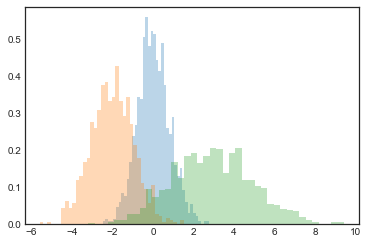

In [8]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [9]:
## count the num of points in a given bin
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 31 246 494 210  19]


### 2-D Histograms and Binning

In [11]:
### Define data from a multi-variate gauissina distribution
mean = [0, 0]
cov = [[1, 1], [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

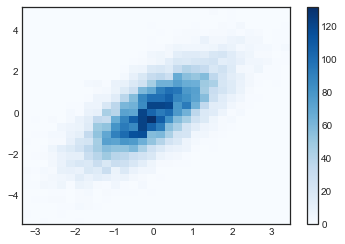

In [12]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label = ('counts in bin')

In [30]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

#### plt.hexbin: Hexagonal Binnings

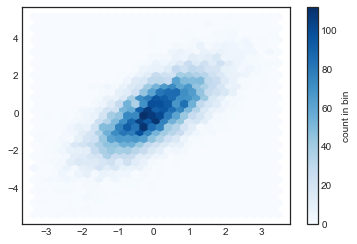

In [35]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar(label='count in bin')
plt.show()

### Kernel Density Estimation

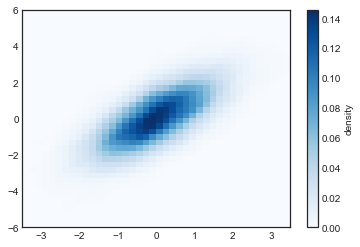

In [36]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)

Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')

cb = plt.colorbar()
cb.set_label('density')